[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%204/4.1_mnist_cnn.ipynb)

## import

In [ ]:
# tensorflow 모듈 import 
import tensorflow as tf

## Dataset

In [ ]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


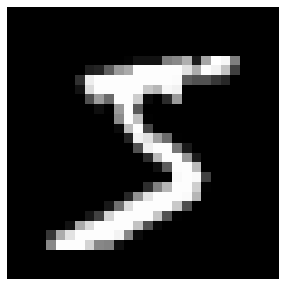

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## Simple CNN

In [ ]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 4ms/step - loss: 0.3955 - accuracy: 0.8899 - val_loss: 0.0928 - val_accuracy: 0.9727
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0794 - accuracy: 0.9765 - val_loss: 0.0657 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0605 - accuracy: 0.9820 - val_loss: 0.0624 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0487 - accuracy: 0.9854 - val_loss: 0.0563 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0397 - accuracy: 0.9883 - val_loss: 0.0568 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.0658 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0586 - val_accuracy

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0551 - accuracy: 0.9851


[0.0550571046769619, 0.9850999712944031]

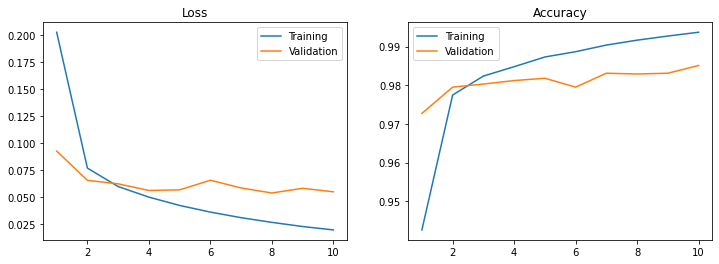

In [ ]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

## CNN 레이어 중간 출력값을 시각화

In [ ]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv (Conv2D)                (None, 26, 26, 32)        320       
_________________________________________________________________
pool (MaxPooling2D)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
# 레이어 
model.layers

In [ ]:
# 첫번째 레이어 선택
model.layers[0]

In [ ]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [ ]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-7.27075756e-01,  1.46875456e-01,  4.02693301e-01,
           -6.71303868e-02,  3.98314923e-01, -6.46262288e-01,
            1.90392897e-01, -3.24461013e-01, -8.99984300e-01,
           -4.02971730e-02,  2.01271892e-01, -1.17213905e+00,
            8.73183906e-01, -1.73754320e-02, -9.05383706e-01,
            1.57798931e-01, -1.74934849e-01, -7.58423507e-02,
            4.46165428e-02,  4.93290126e-01, -7.95668364e-01,
            3.46035302e-01, -8.29338789e-01, -4.01658952e-01,
           -3.50777715e-01,  1.99450150e-01,  2.17454582e-01,
           -2.55935162e-01,  2.77804136e-01, -1.58167765e-01,
            8.83195698e-01,  6.96766302e-02]],
 
         [[-8.90297666e-02,  1.95714027e-01,  2.27585897e-01,
           -9.76476967e-01, -1.40947413e+00, -3.07316303e-01,
            1.87507436e-01, -2.72753567e-01, -1.06099224e+00,
            2.38024384e-01,  2.38562867e-01, -2.89463162e-01,
           

In [ ]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-7.27075756e-01,  1.46875456e-01,  4.02693301e-01,
          -6.71303868e-02,  3.98314923e-01, -6.46262288e-01,
           1.90392897e-01, -3.24461013e-01, -8.99984300e-01,
          -4.02971730e-02,  2.01271892e-01, -1.17213905e+00,
           8.73183906e-01, -1.73754320e-02, -9.05383706e-01,
           1.57798931e-01, -1.74934849e-01, -7.58423507e-02,
           4.46165428e-02,  4.93290126e-01, -7.95668364e-01,
           3.46035302e-01, -8.29338789e-01, -4.01658952e-01,
          -3.50777715e-01,  1.99450150e-01,  2.17454582e-01,
          -2.55935162e-01,  2.77804136e-01, -1.58167765e-01,
           8.83195698e-01,  6.96766302e-02]],

        [[-8.90297666e-02,  1.95714027e-01,  2.27585897e-01,
          -9.76476967e-01, -1.40947413e+00, -3.07316303e-01,
           1.87507436e-01, -2.72753567e-01, -1.06099224e+00,
           2.38024384e-01,  2.38562867e-01, -2.89463162e-01,
           4.25470710e-01,  

In [ ]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-5.3787671e-02, -5.2496571e-02, -3.1037807e-01, -6.2355306e-03,
        4.3236297e-03, -2.5760353e-01, -1.4174899e-01, -1.1861333e-01,
        2.5405148e-01, -3.0890337e-04, -2.5814164e-01, -8.1634715e-02,
        1.1744299e-03, -1.4437065e-01, -2.2770142e-02, -7.2788792e-03,
       -6.5501705e-02, -1.8962550e-01, -1.4084974e-01, -9.7447420e-03,
       -1.8232903e-01, -2.1299854e-01, -5.7888988e-02, -3.1682134e-01,
       -1.5401344e-01, -1.2288534e-01, -1.4725171e-01, -2.1240796e-01,
       -1.7704983e-01, -1.0568336e-02,  1.9348746e-03, -2.6310834e-01],
      dtype=float32)>

In [ ]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [ ]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

2

In [ ]:
# 첫 번째 레이어(conv) 출력층 
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

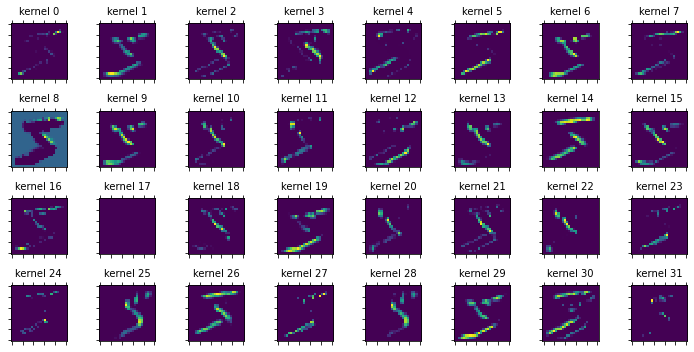

In [ ]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두 번째 레이어(pool) 출력층 
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


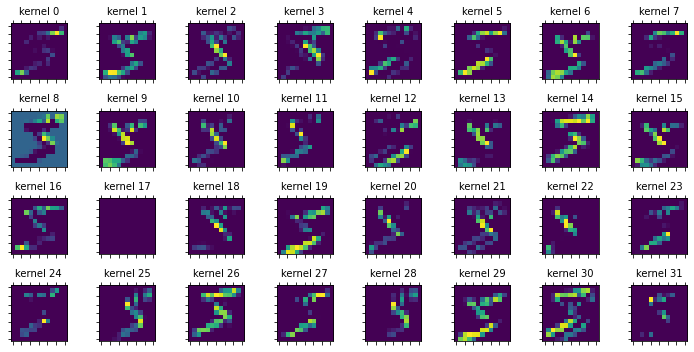

In [ ]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()